In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#Checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


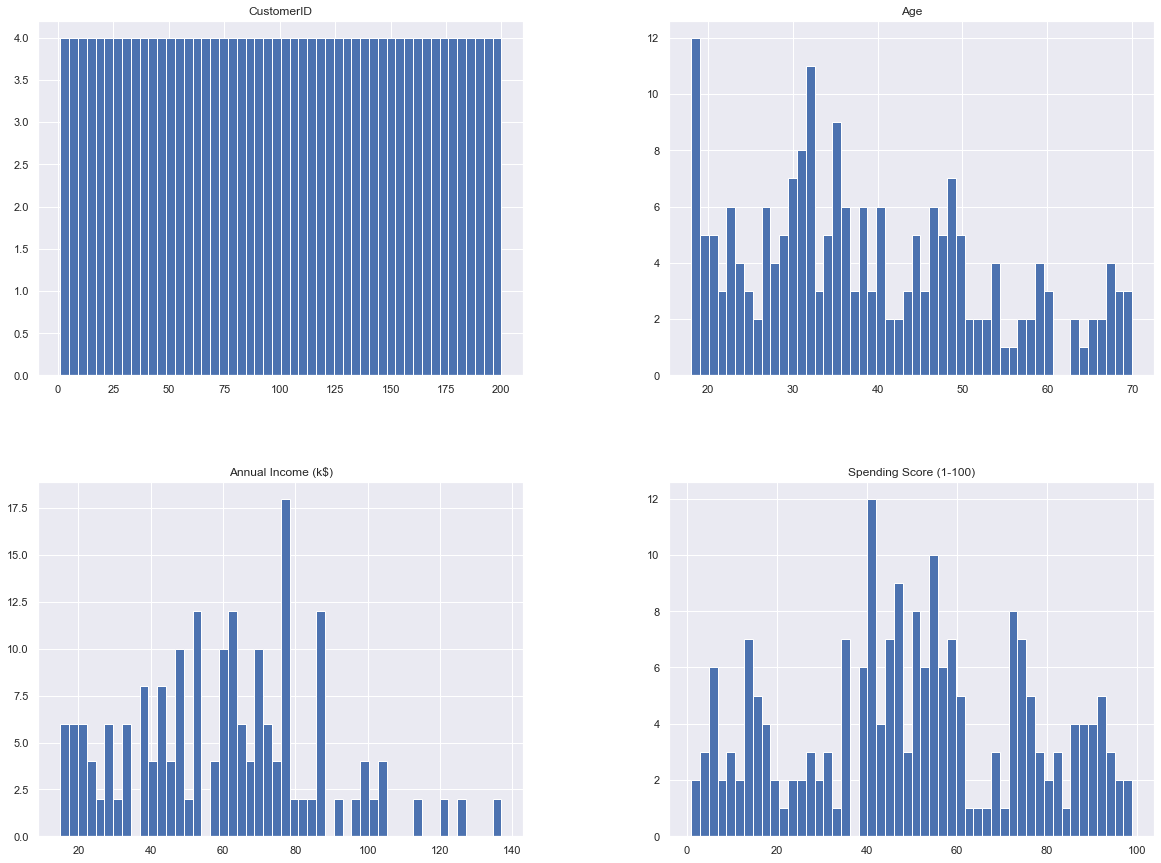

In [18]:
# Perform EDA on the data
print(df.describe())
df.hist(bins=50, figsize=(20,15))
plt.show()

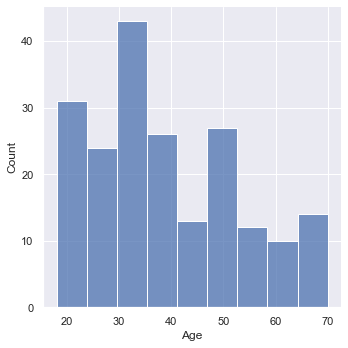

In [19]:
sns.displot(df["Age"])

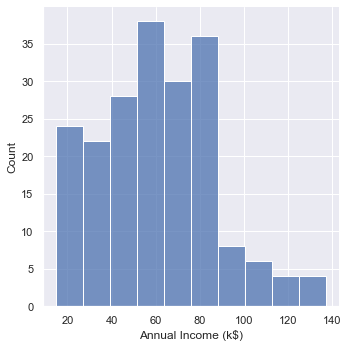

In [20]:
sns.displot(df["Annual Income (k$)"])

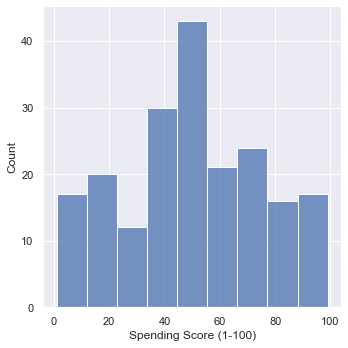

In [21]:
sns.displot(df["Spending Score (1-100)"])

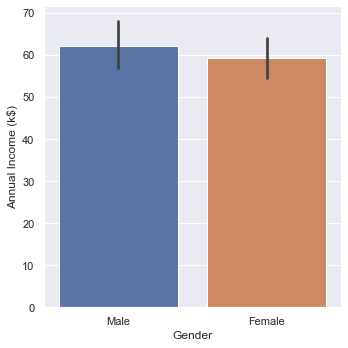

In [22]:
sns.catplot(data=df, x="Gender", y="Annual Income (k$)", kind="bar")

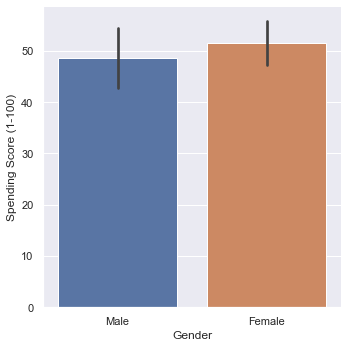

In [23]:
sns.catplot(data=df, x="Gender", y="Spending Score (1-100)", kind="bar")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

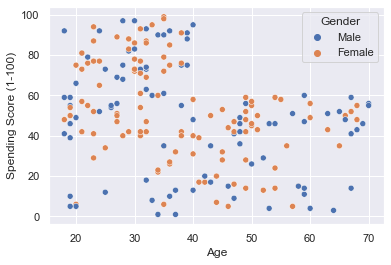

In [24]:
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

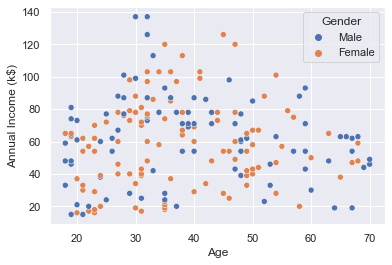

In [25]:
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Gender")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

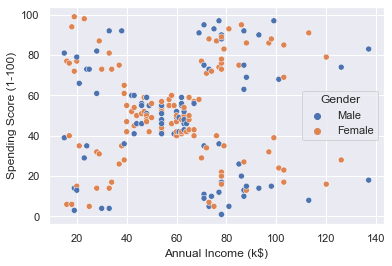

In [26]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")

In [10]:
#Now through dataset as we can see that customer's  Annual income and spending score decides if they are our customer or not
X = df.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [11]:
#Choosing the number of Clusters
#Clustering with respect to Spending score and annual income
wcss = []
##wcsss = Within Clusters Sum of Squares
for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init = 'k-means++' , random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Atharva Yadav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


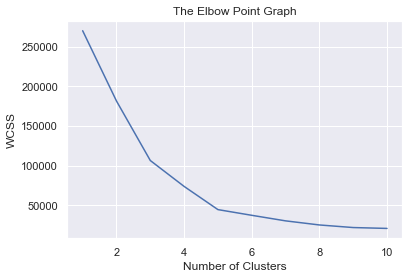

In [12]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
#Training the Kmeans Clustering Model
kmeans = KMeans(n_clusters = 5 , init = 'k-means++' , random_state=0)
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


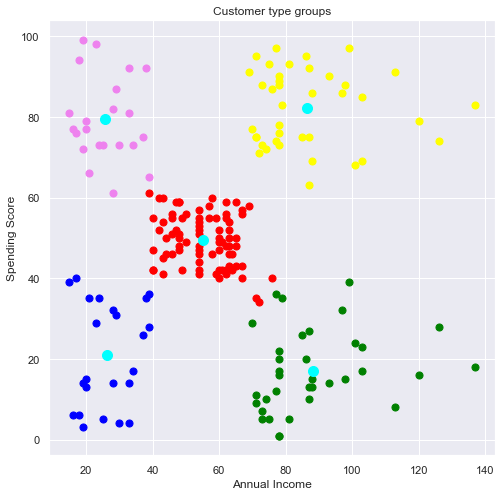

In [16]:
#Visualizing the Clusters

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer type groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [27]:
#clustering using age and spending score
X1 = df.iloc[:,[2,4]].values
wcss1 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init = 'k-means++' , random_state=0)
    kmeans.fit(X1)
    wcss1.append(kmeans.inertia_)

C:\Users\Atharva Yadav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


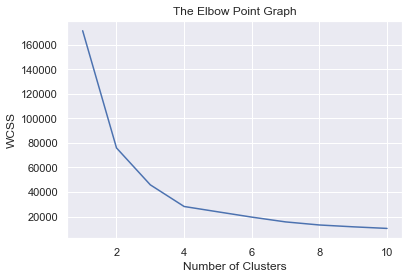

In [29]:
#plotting an elbow graph

sns.set()
plt.plot(range(1,11) , wcss1)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
#Training the Kmeans Clustering Model
kmeans = KMeans(n_clusters = 5 , init = 'k-means++' , random_state=0)
Y1 = kmeans.fit_predict(X1)
print(Y1)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 4 0 4 1 4 1 3 1 3 1 4 0 4 1 3 1 3 1 3 1 3
 1 3 1 2 1 4 0 4 0 2 0 0 0 2 0 0 2 4 4 2 2 0 2 2 0 2 2 2 0 4 2 0 0 2 4 2 2
 2 0 4 4 0 4 2 0 2 4 0 4 2 0 0 4 2 0 4 4 0 0 4 0 4 0 0 4 2 0 2 0 2 2 2 2 2
 0 4 0 0 0 2 2 4 2 0 4 0 1 0 1 4 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 4 1
 3 1 3 1 3 1 3 1 3 1 3 1 4 1 3 1 4 1 3 1 4 0 3 1 3 1 3 1 3 1 3 1 4 1 3 1 4
 1 3 1 3 1 3 1 3 1 3 1 4 1 3 1]


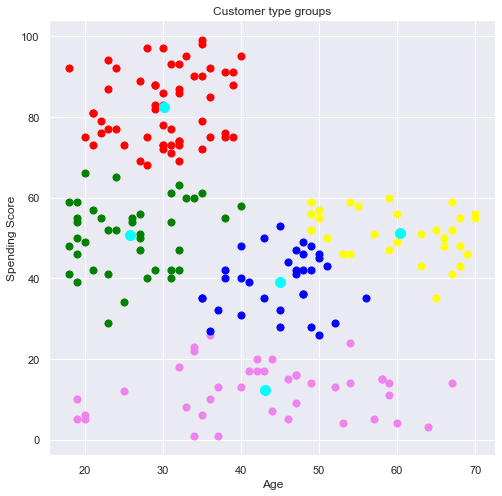

In [33]:
#Visualizing the Clusters

plt.figure(figsize=(8,8))
plt.scatter(X1[Y1==0,0], X1[Y1==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X1[Y1==1,0], X1[Y1==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X1[Y1==2,0], X1[Y1==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X1[Y1==3,0], X1[Y1==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X1[Y1==4,0], X1[Y1==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer type groups')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [47]:
#clustering using age and spending score
X3 = df.iloc[:,[2,3]].values
wcss2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init = 'k-means++' , random_state=0)
    kmeans.fit(X3)
    wcss2.append(kmeans.inertia_)

C:\Users\Atharva Yadav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


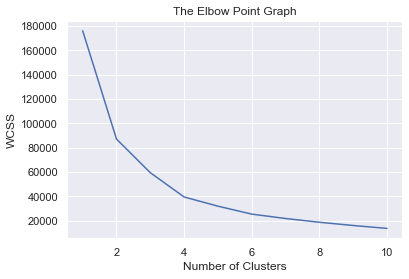

In [51]:
#plotting an elbow graph

sns.set()
plt.plot(range(1,11) , wcss2)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
#Training the Kmeans Clustering Model
kmeans = KMeans(n_clusters = 5 , init = 'k-means++' , random_state=0)
Y3 = kmeans.fit_predict(X3)
print(Y3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1
 1 1 4 3 4 3 4 3 4 3 4 4 4 3 4 4 3 3 3 3 3 4 3 3 4 3 3 3 4 3 3 4 4 3 3 3 3
 3 4 3 4 4 3 3 4 3 3 4 3 3 4 4 3 3 4 3 4 4 4 3 4 3 4 4 3 3 4 3 4 3 3 3 3 3
 4 0 4 4 4 3 3 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


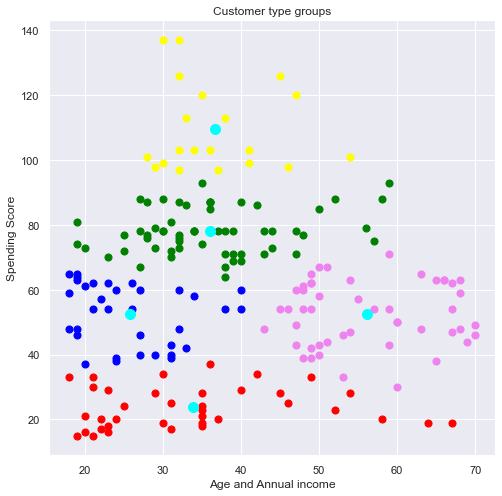

In [53]:
#Visualizing the Clusters

plt.figure(figsize=(8,8))
plt.scatter(X3[Y3==0,0], X3[Y3==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X3[Y3==1,0], X3[Y3==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X3[Y3==2,0], X3[Y3==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X3[Y3==3,0], X3[Y3==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X3[Y3==4,0], X3[Y3==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer type groups')
plt.xlabel('Age and Annual income')
plt.ylabel('Spending Score')
plt.show()

SyntaxError: invalid syntax (1933637684.py, line 1)